# Lecture 4 - Simple Decision Tree (Theory)

### Binary Outcome Variable

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url='https://raw.githubusercontent.com/ISSS623-AHA/ISSS623_2024/main/Lecture%204/ED_Admission_Small.csv'
ed = pd.read_csv(url)
ed.reset_index(inplace=True)

In [11]:
ed

,index,Age,Income,Diabetes,Cholesterol,ED Admission
0,0,<30,High,NO,BAD,NO
1,1,<30,High,NO,FAIR,NO
2,2,30-60,High,NO,BAD,YES
3,3,>60,Medium,NO,BAD,YES
4,4,>60,Low,YES,BAD,YES
5,5,>60,Low,YES,FAIR,NO
6,6,30-60,Low,YES,FAIR,YES
7,7,<30,Medium,NO,BAD,NO
8,8,<30,Low,YES,BAD,YES
9,9,>60,Medium,YES,BAD,YES


In [4]:
#split dataset in features and target variable
feature_cols = ['Age', 'Income', 'Diabetes', 'Cholesterol']


In [5]:
# sk-learn will need feature-cols to be numeric
# one-way is to convert the categories using one-hot encoding (converting to numeric cols using label encoding may lead to misleading results for qualitative vars)
one_hot_ed=None
one_hot_ed = pd.get_dummies(ed[['Age', 'Income', 'Diabetes', 'Cholesterol']],drop_first=True)
one_hot_ed.reset_index(inplace=True)
ed=ed.merge(one_hot_ed,how='left',on='index')
ed.drop(feature_cols,axis=1,inplace=True)
ed.head()


,index,ED Admission,Age_<30,Age_>60,Income_Low,Income_Medium,Diabetes_YES,Cholesterol_FAIR
0,0,NO,True,False,False,False,False,False
1,1,NO,True,False,False,False,False,True
2,2,YES,False,False,False,False,False,False
3,3,YES,False,True,False,True,False,False
4,4,YES,False,True,True,False,True,False


In [6]:
x = ed.drop(['index','ED Admission'],axis=1) # Features
y = ed['ED Admission'] # Target variable
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

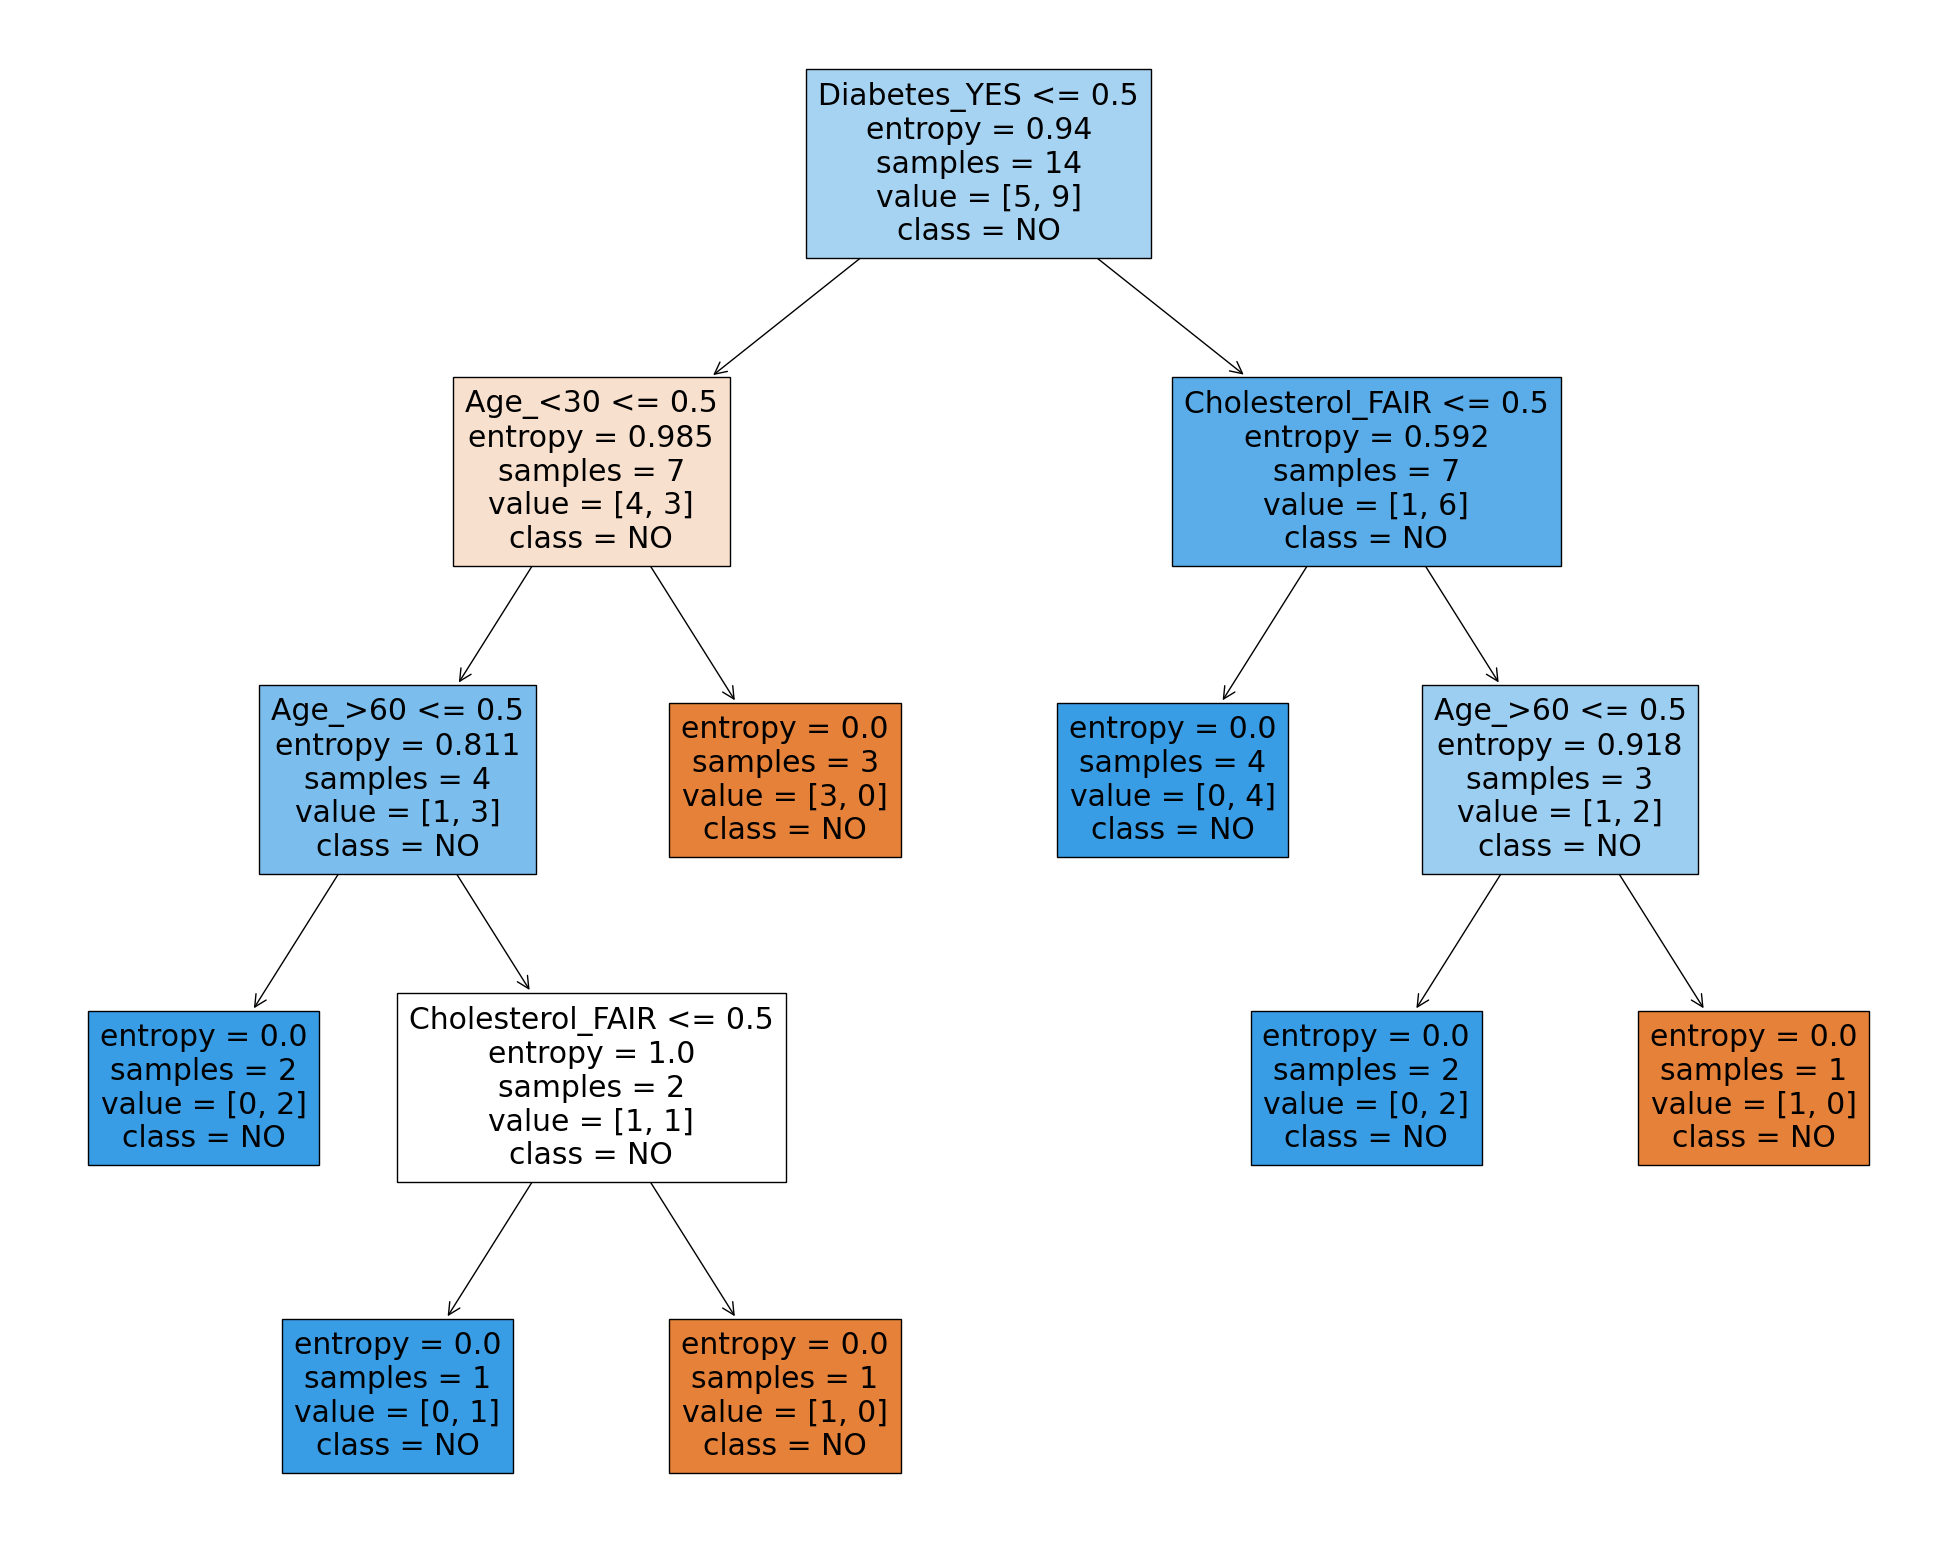

In [7]:
fig = plt.figure(figsize=(25,20))
jpg=tree.plot_tree(dtree, 
                   feature_names=x.columns,  
                   class_names=y,
                   filled=True)


### Continuous Outcome Variable

Dataset from: https://www.kaggle.com/datasets/mustafaali96/weight-height 

In [10]:
url = 'https://raw.githubusercontent.com/ISSS623-AHA/ISSS623_2024/main/Lecture%204/weight-height.csv'
htwt = pd.read_csv(url)


In [11]:
htwt.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


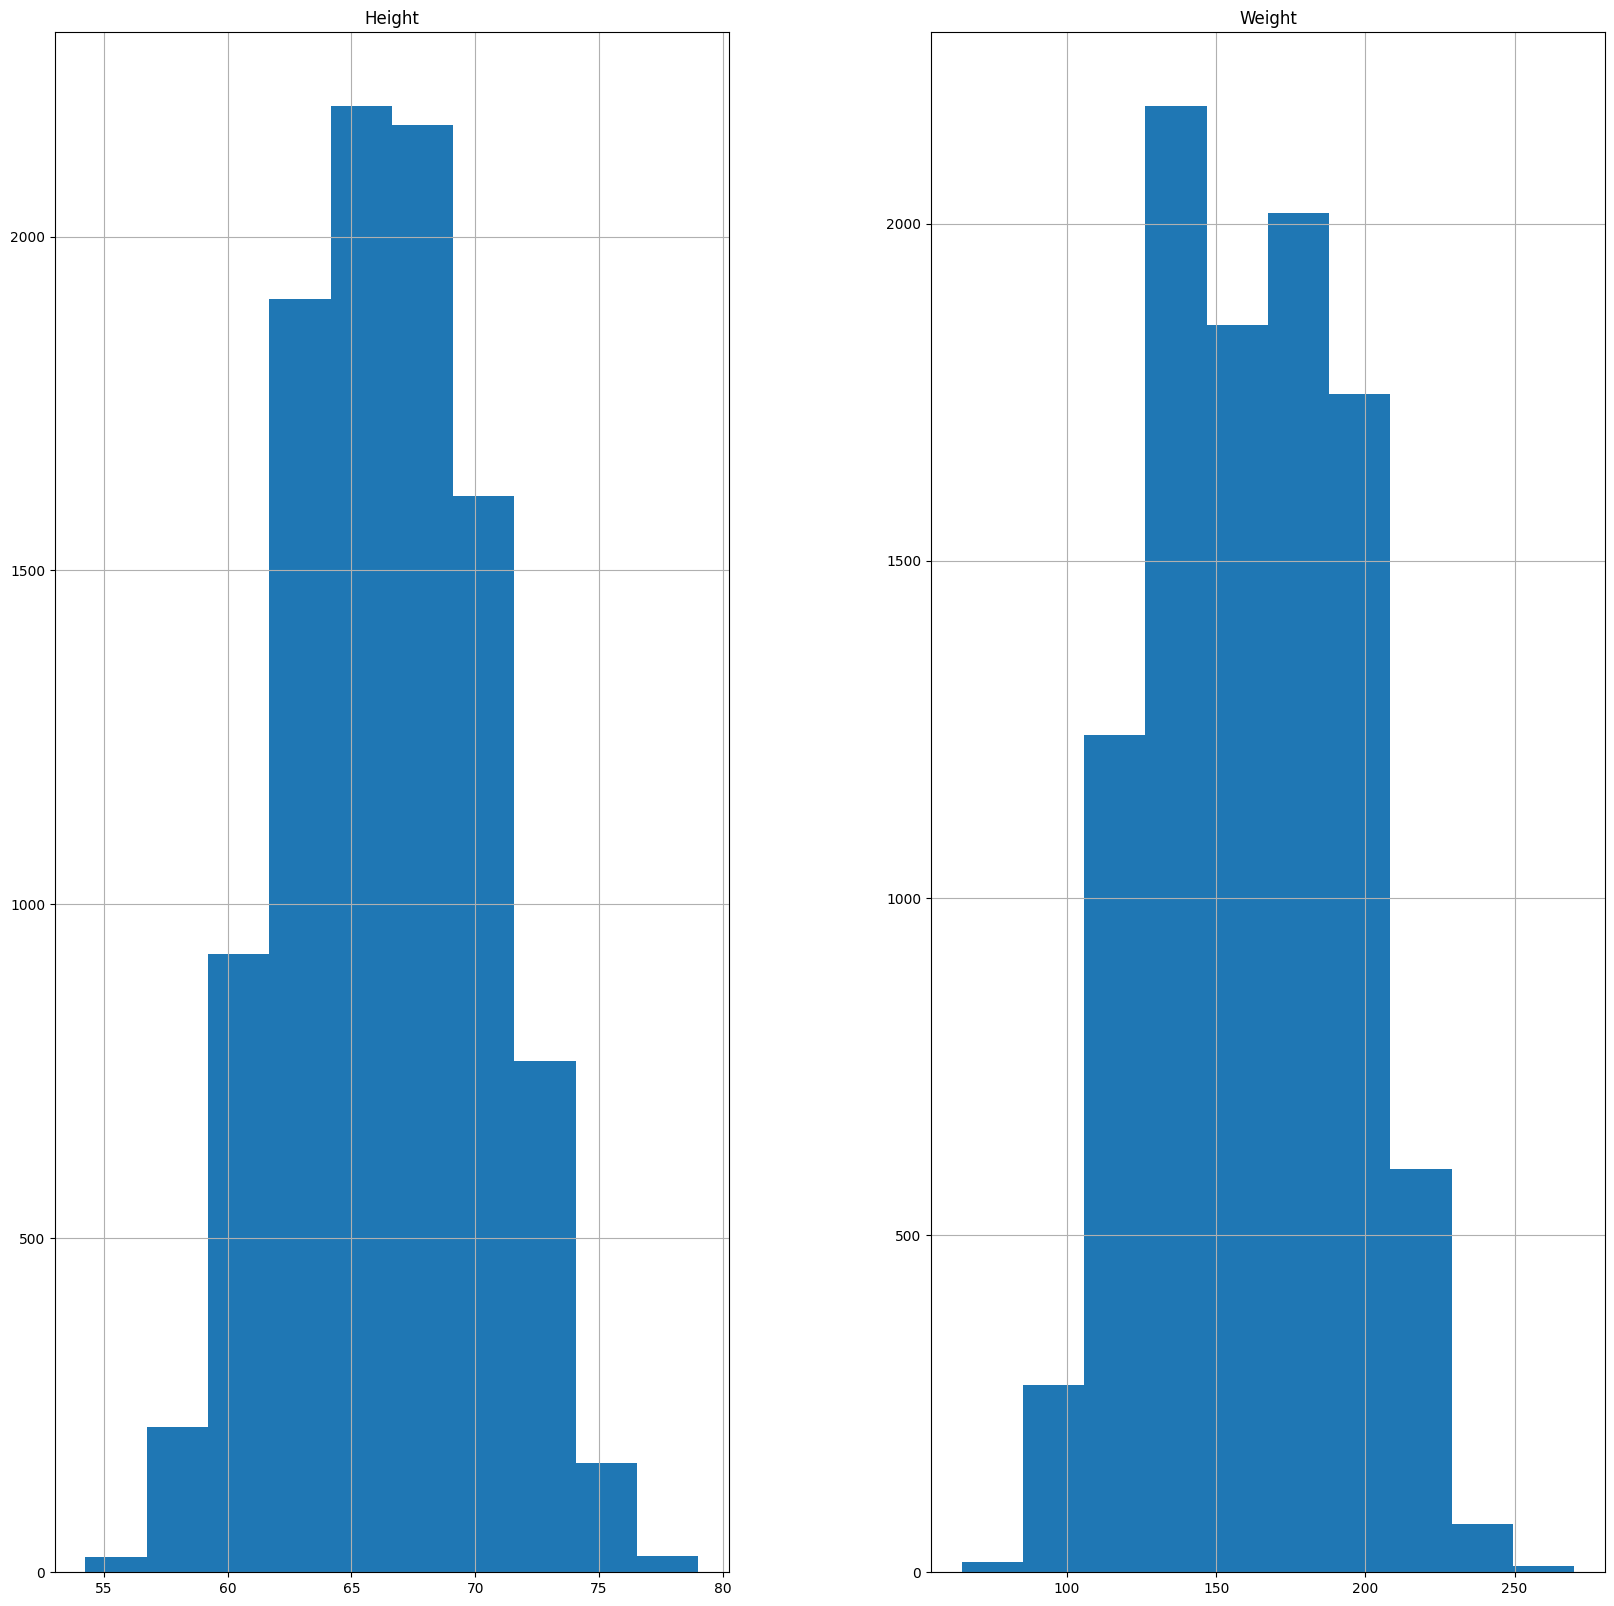

In [12]:
p = htwt.hist(figsize=(20,20))

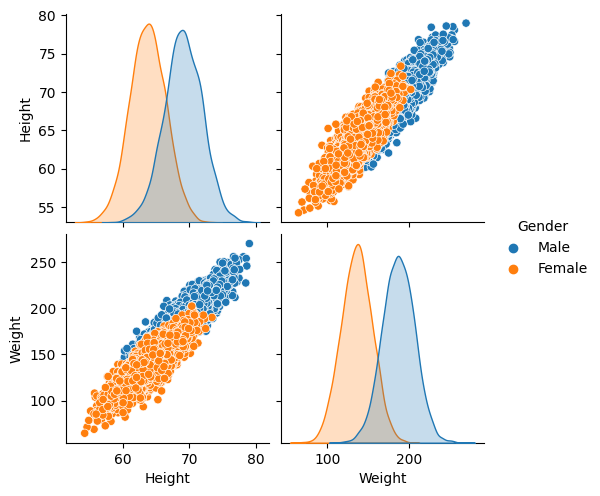

In [13]:
sns.pairplot(htwt, hue='Gender')

In [14]:
x = htwt.drop(['Gender','Weight'],axis=1) # Features - Height
y = htwt['Weight'] # Target variable - Weight

In [15]:
x=htwt.iloc[:,1:2].values
y=htwt.iloc[:,-1].values
len(y)

10000

In [17]:
# Splitting the data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.20, random_state=0)

In [18]:
# Creating regression models with two different depths
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [19]:
regr_1

DecisionTreeRegressor(max_depth=2)

In [20]:
# Making prediction
X_test = np.arange(50,75, 0.5)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

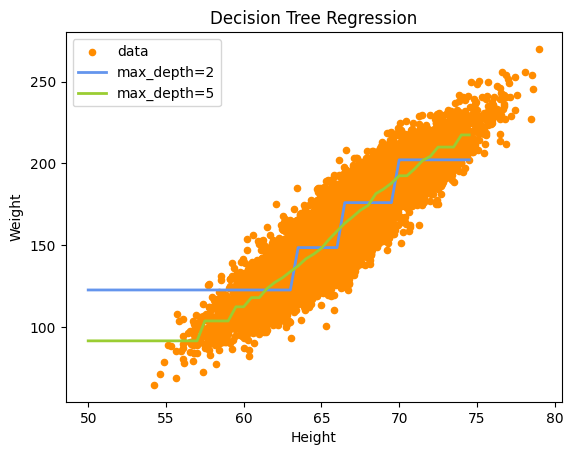

In [21]:
# Plot the results
plt.figure()
plt.scatter(x, y, s=20, 
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

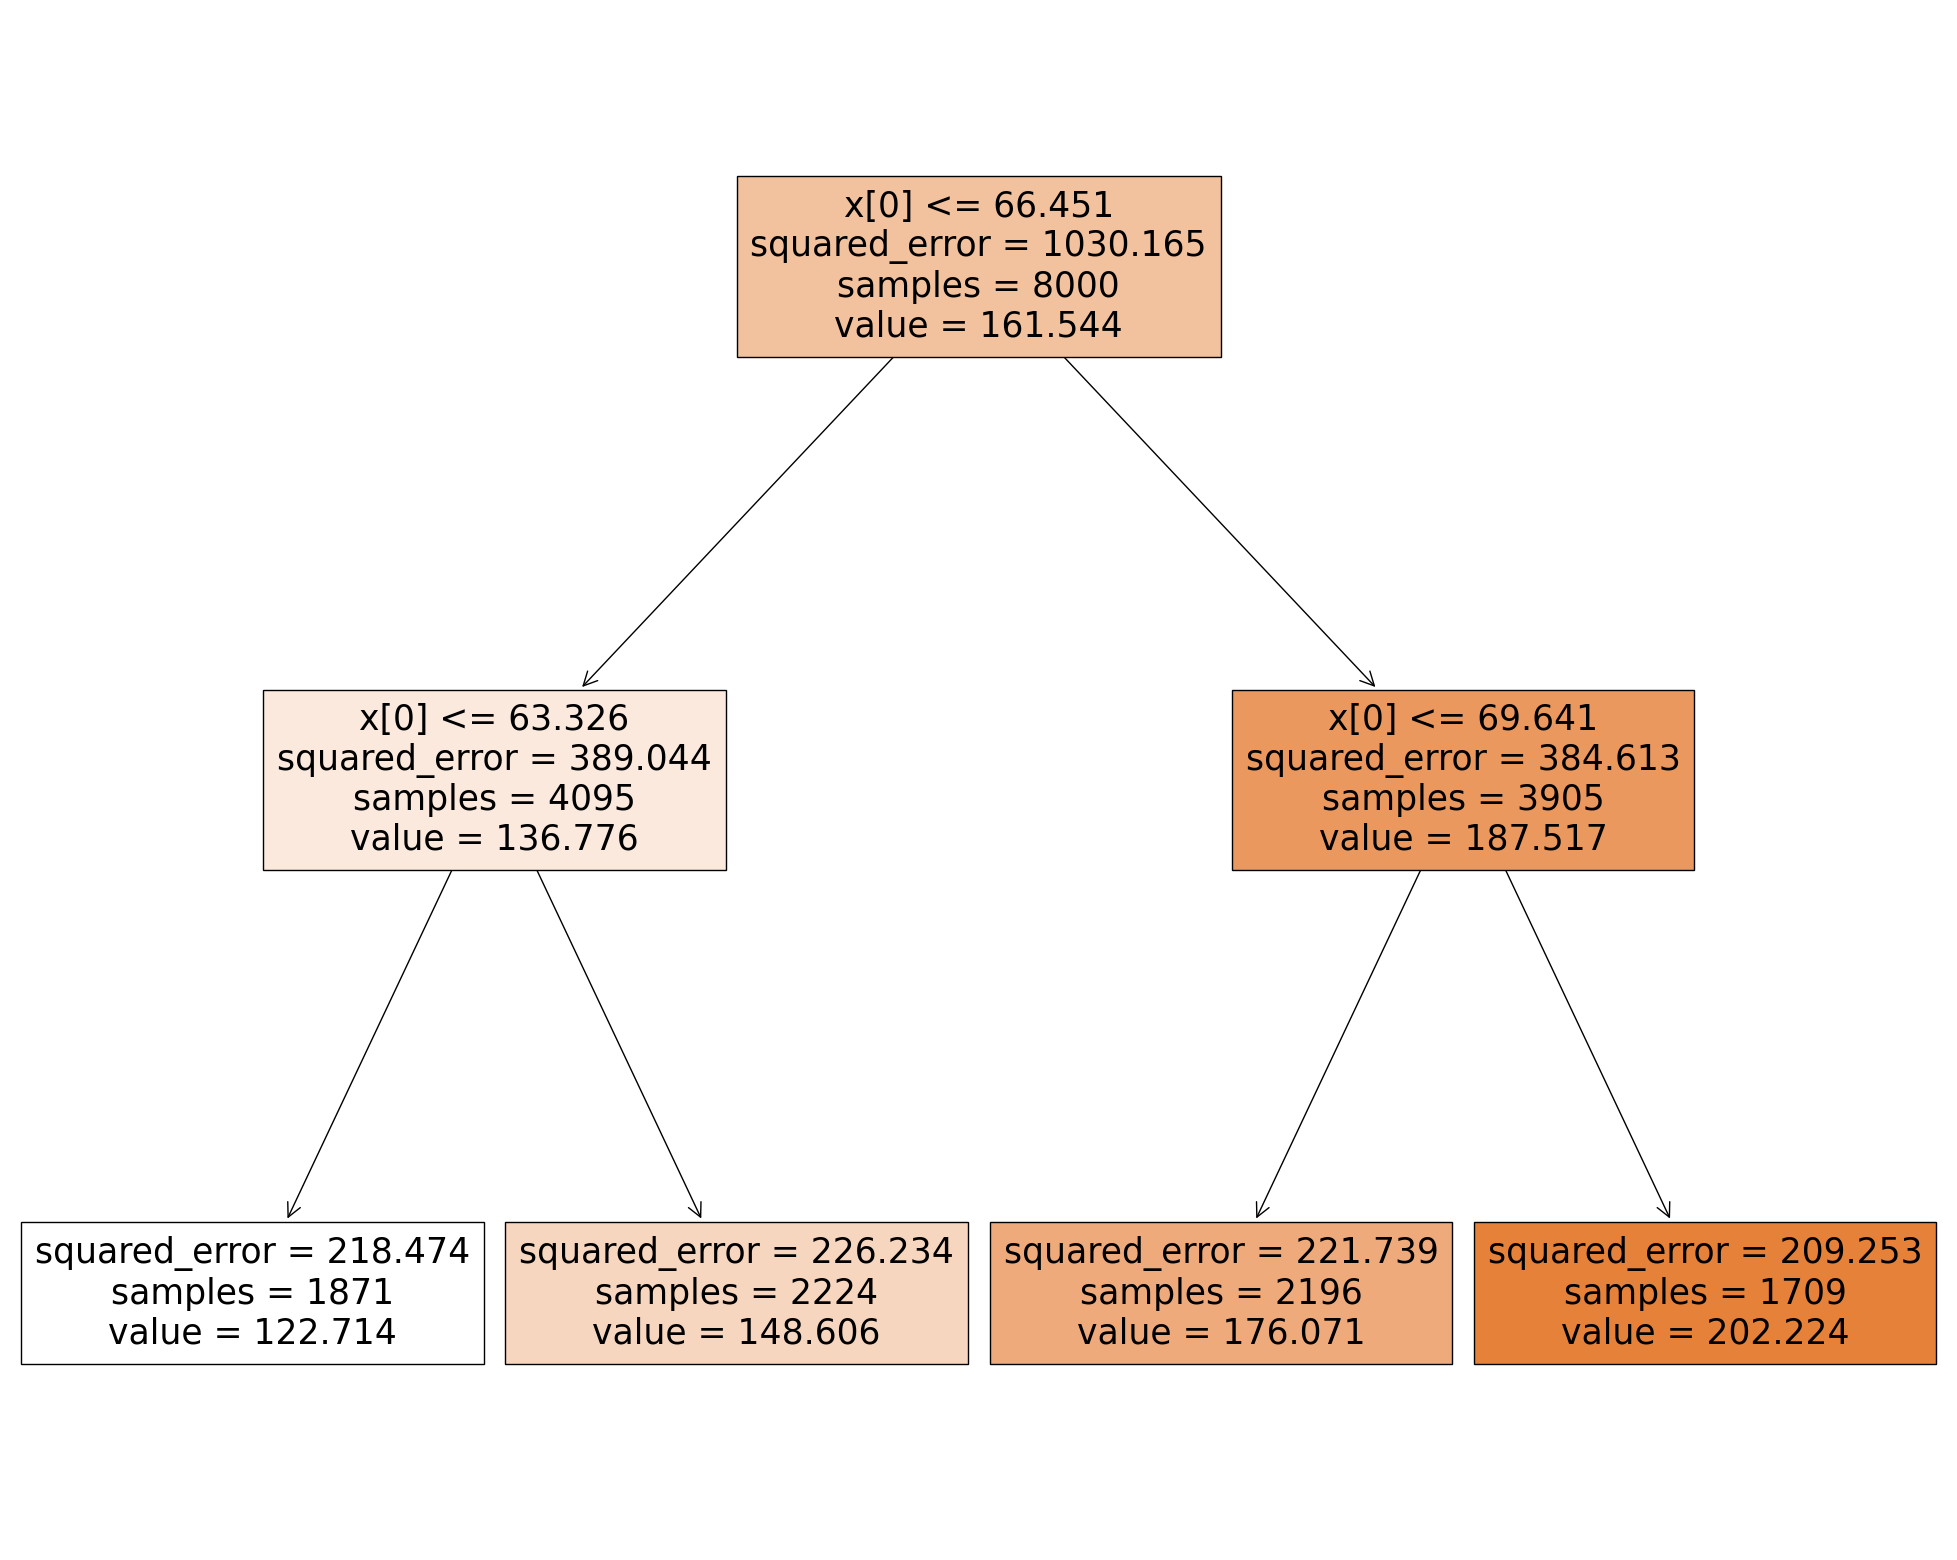

In [22]:
fig = plt.figure(figsize=(25,20))
jpg=tree.plot_tree(regr_1, 
                   filled=True)

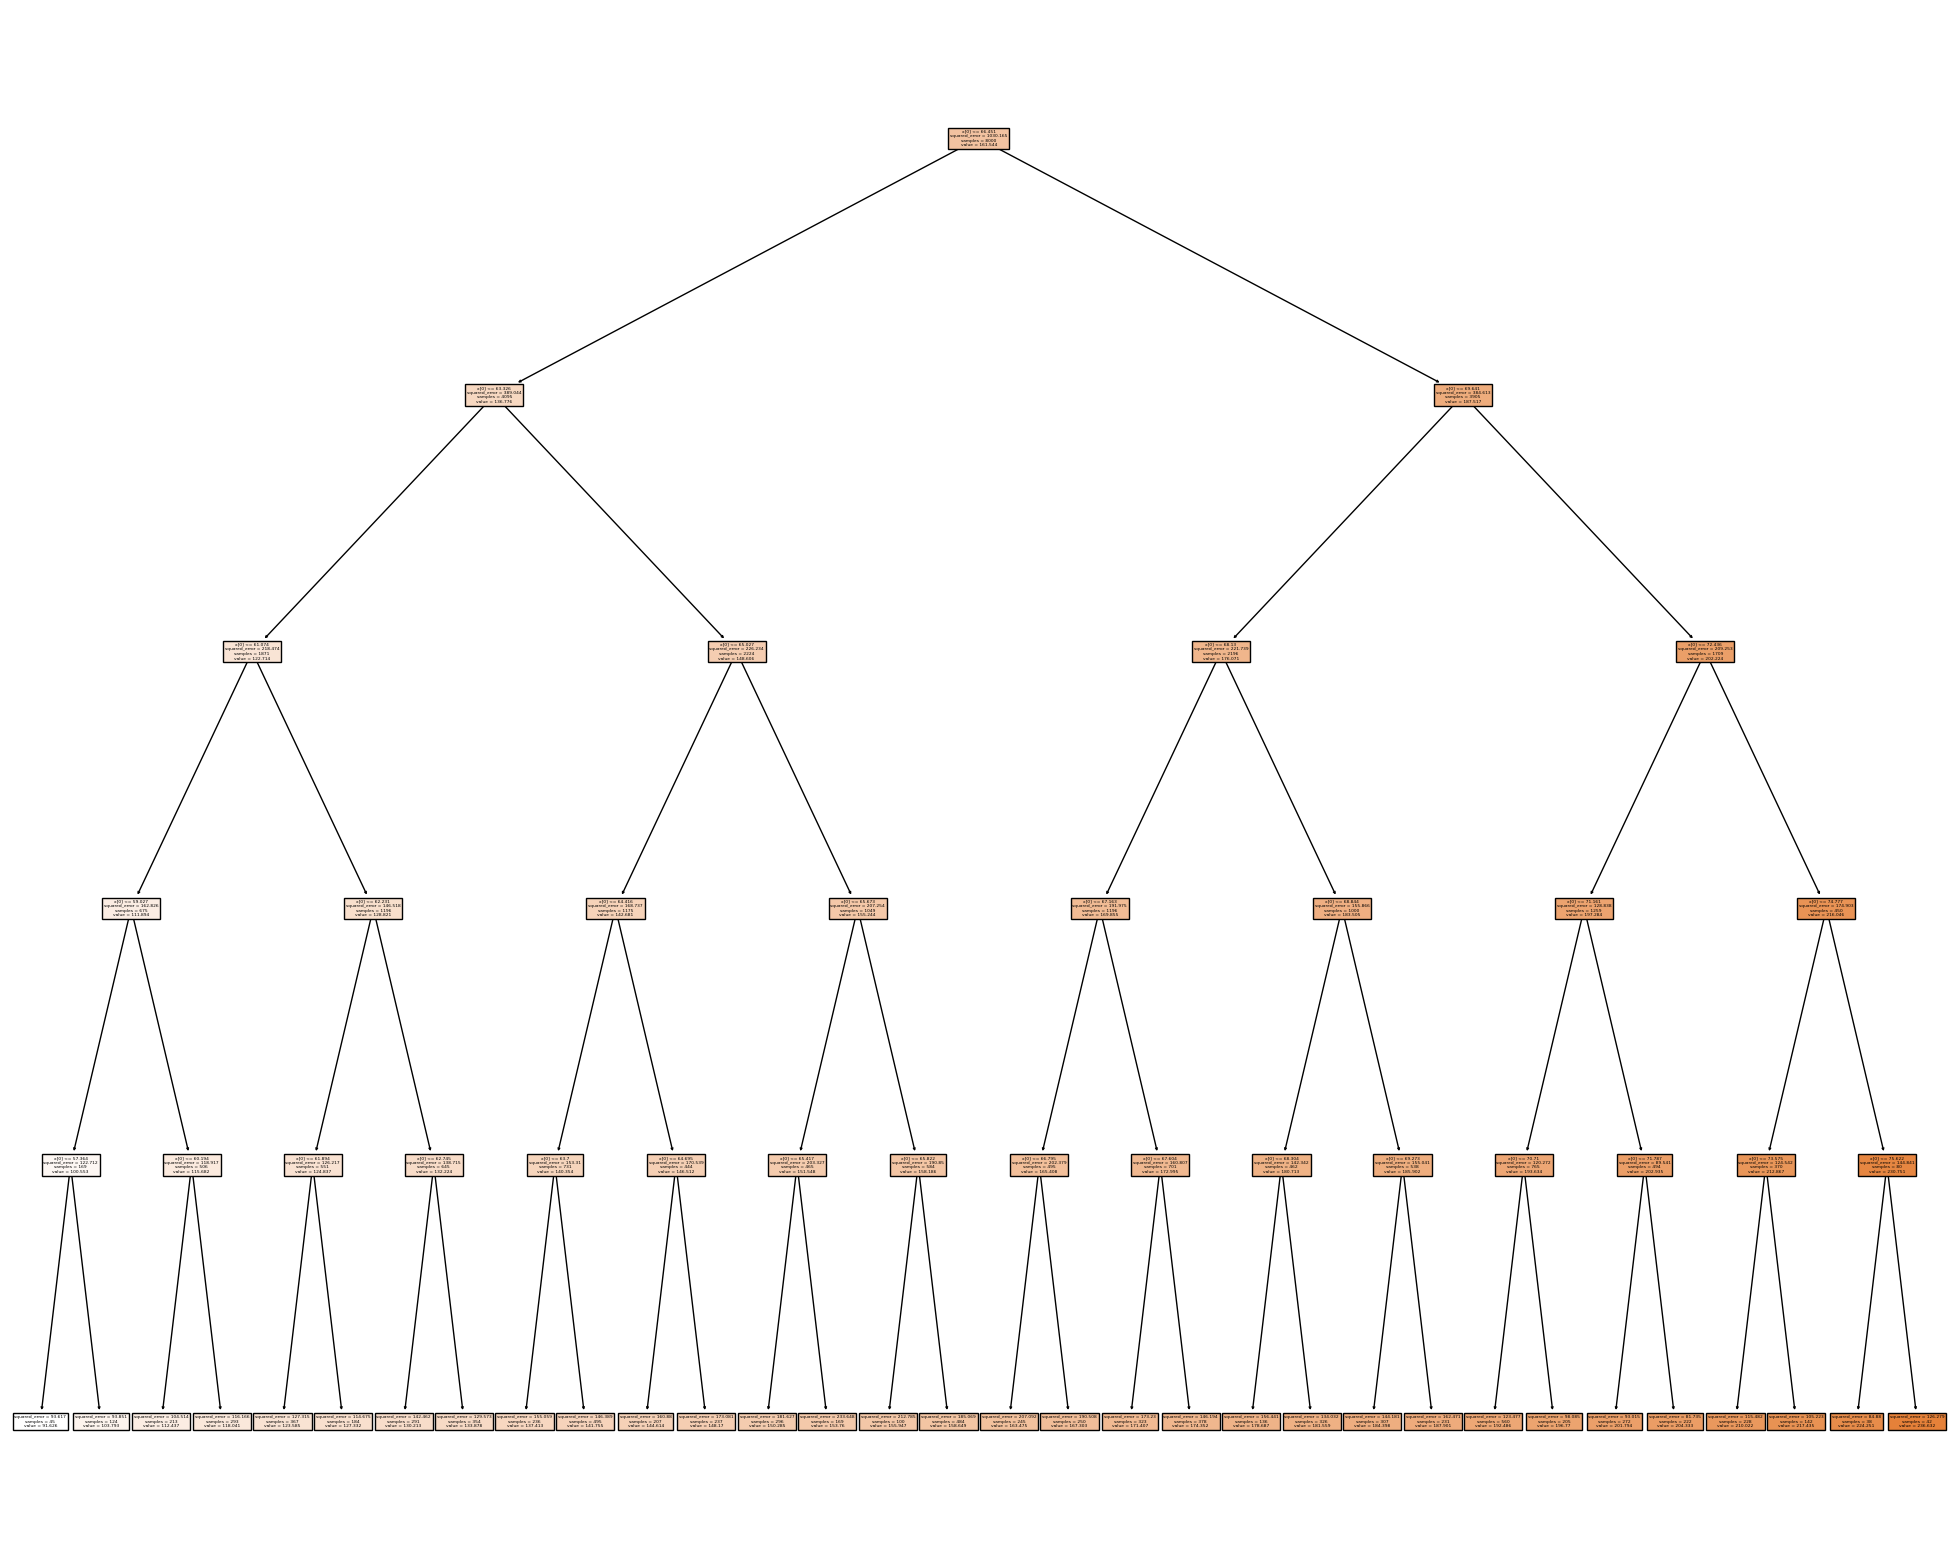

In [23]:
fig = plt.figure(figsize=(25,20))
jpg=tree.plot_tree(regr_2, 
                   filled=True)